In [62]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [63]:
dataset = pd.read_csv('diabetes_data_upload.csv')

In [64]:
dataset.head(500)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,Negative
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive


In [65]:
dataset.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [66]:
dataset = dataset.replace({'No': 0, 'Yes': 1})
dataset = dataset.replace({'Positive': 1, 'Negative': 0})
dataset = dataset.replace({'Male': 1,'Female': 0})

In [67]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [68]:
X = dataset.iloc[:,0:16]

In [69]:
X.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0


In [70]:
y = dataset.iloc[:,16:]

In [71]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [73]:
model = RandomForestClassifier()

In [74]:
model.fit(X_train, y_train)

<ipython-input-74-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [75]:
y_predict = model.predict(X_test)

In [76]:
model.score(X_train, y_train)

1.0

In [77]:
model.score(X_test, y_test)

1.0

In [78]:
import matplotlib.pyplot as plt

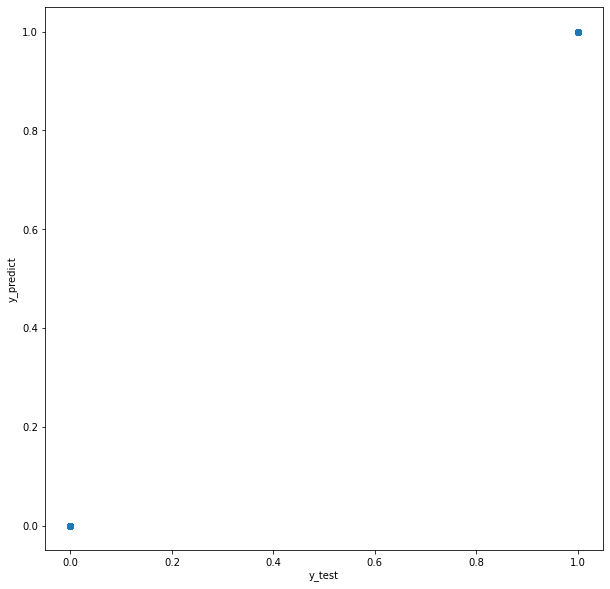

In [79]:
plt.figure(figsize =(10,10))
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.scatter(y_test,y_predict)

In [80]:
import pickle

In [81]:
file = open('Prediction_of_Diabetes.pkl', 'wb')
pickle.dump(model, file)

In [83]:
Diabetes_Prediction_model = pickle.load(open('Prediction_of_Diabetes.pkl', 'rb'))

UnpicklingError: invalid load key, '\x00'.

In [84]:
Diabetes_Prediction_model.score(X_test, y_test)

1.0

In [85]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [57]:
X_train.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [58]:
gender = "Male"
if(gender == 'Male'):
    gender =1
else:
    gender =0

In [59]:
gender

1

In [60]:
output =1
if(output == 1):
    output = "Positive"
else:
    output = "Negative"

In [61]:
output


'Positive'

In [3]:
x = input()
if(x==1):
    result = "Positive"

TypeError: 'int' object is not subscriptable